In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

warnings.filterwarnings('ignore')


In [3]:
# importing data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# checking data types
data.dtypes
# data.info()


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# displaying the shape of the data
data.shape

(284807, 31)

In [6]:
# checking for missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# data description
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


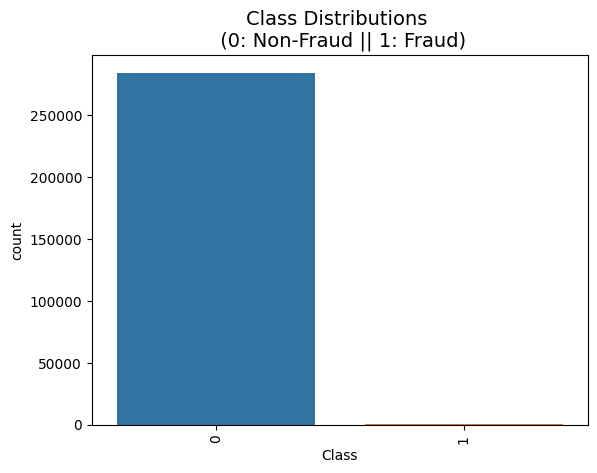

In [8]:
# categorical data

data['Class'] = data['Class'].astype('category')
data['Class'].value_counts()
data['Class'].value_counts().plot(kind='bar')

non_fraud = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

sns.countplot(data=data, x='Class')
plt.title('Class Distributions \n (0: Non-Fraud || 1: Fraud)', fontsize=14)
plt.show()




<Axes: >

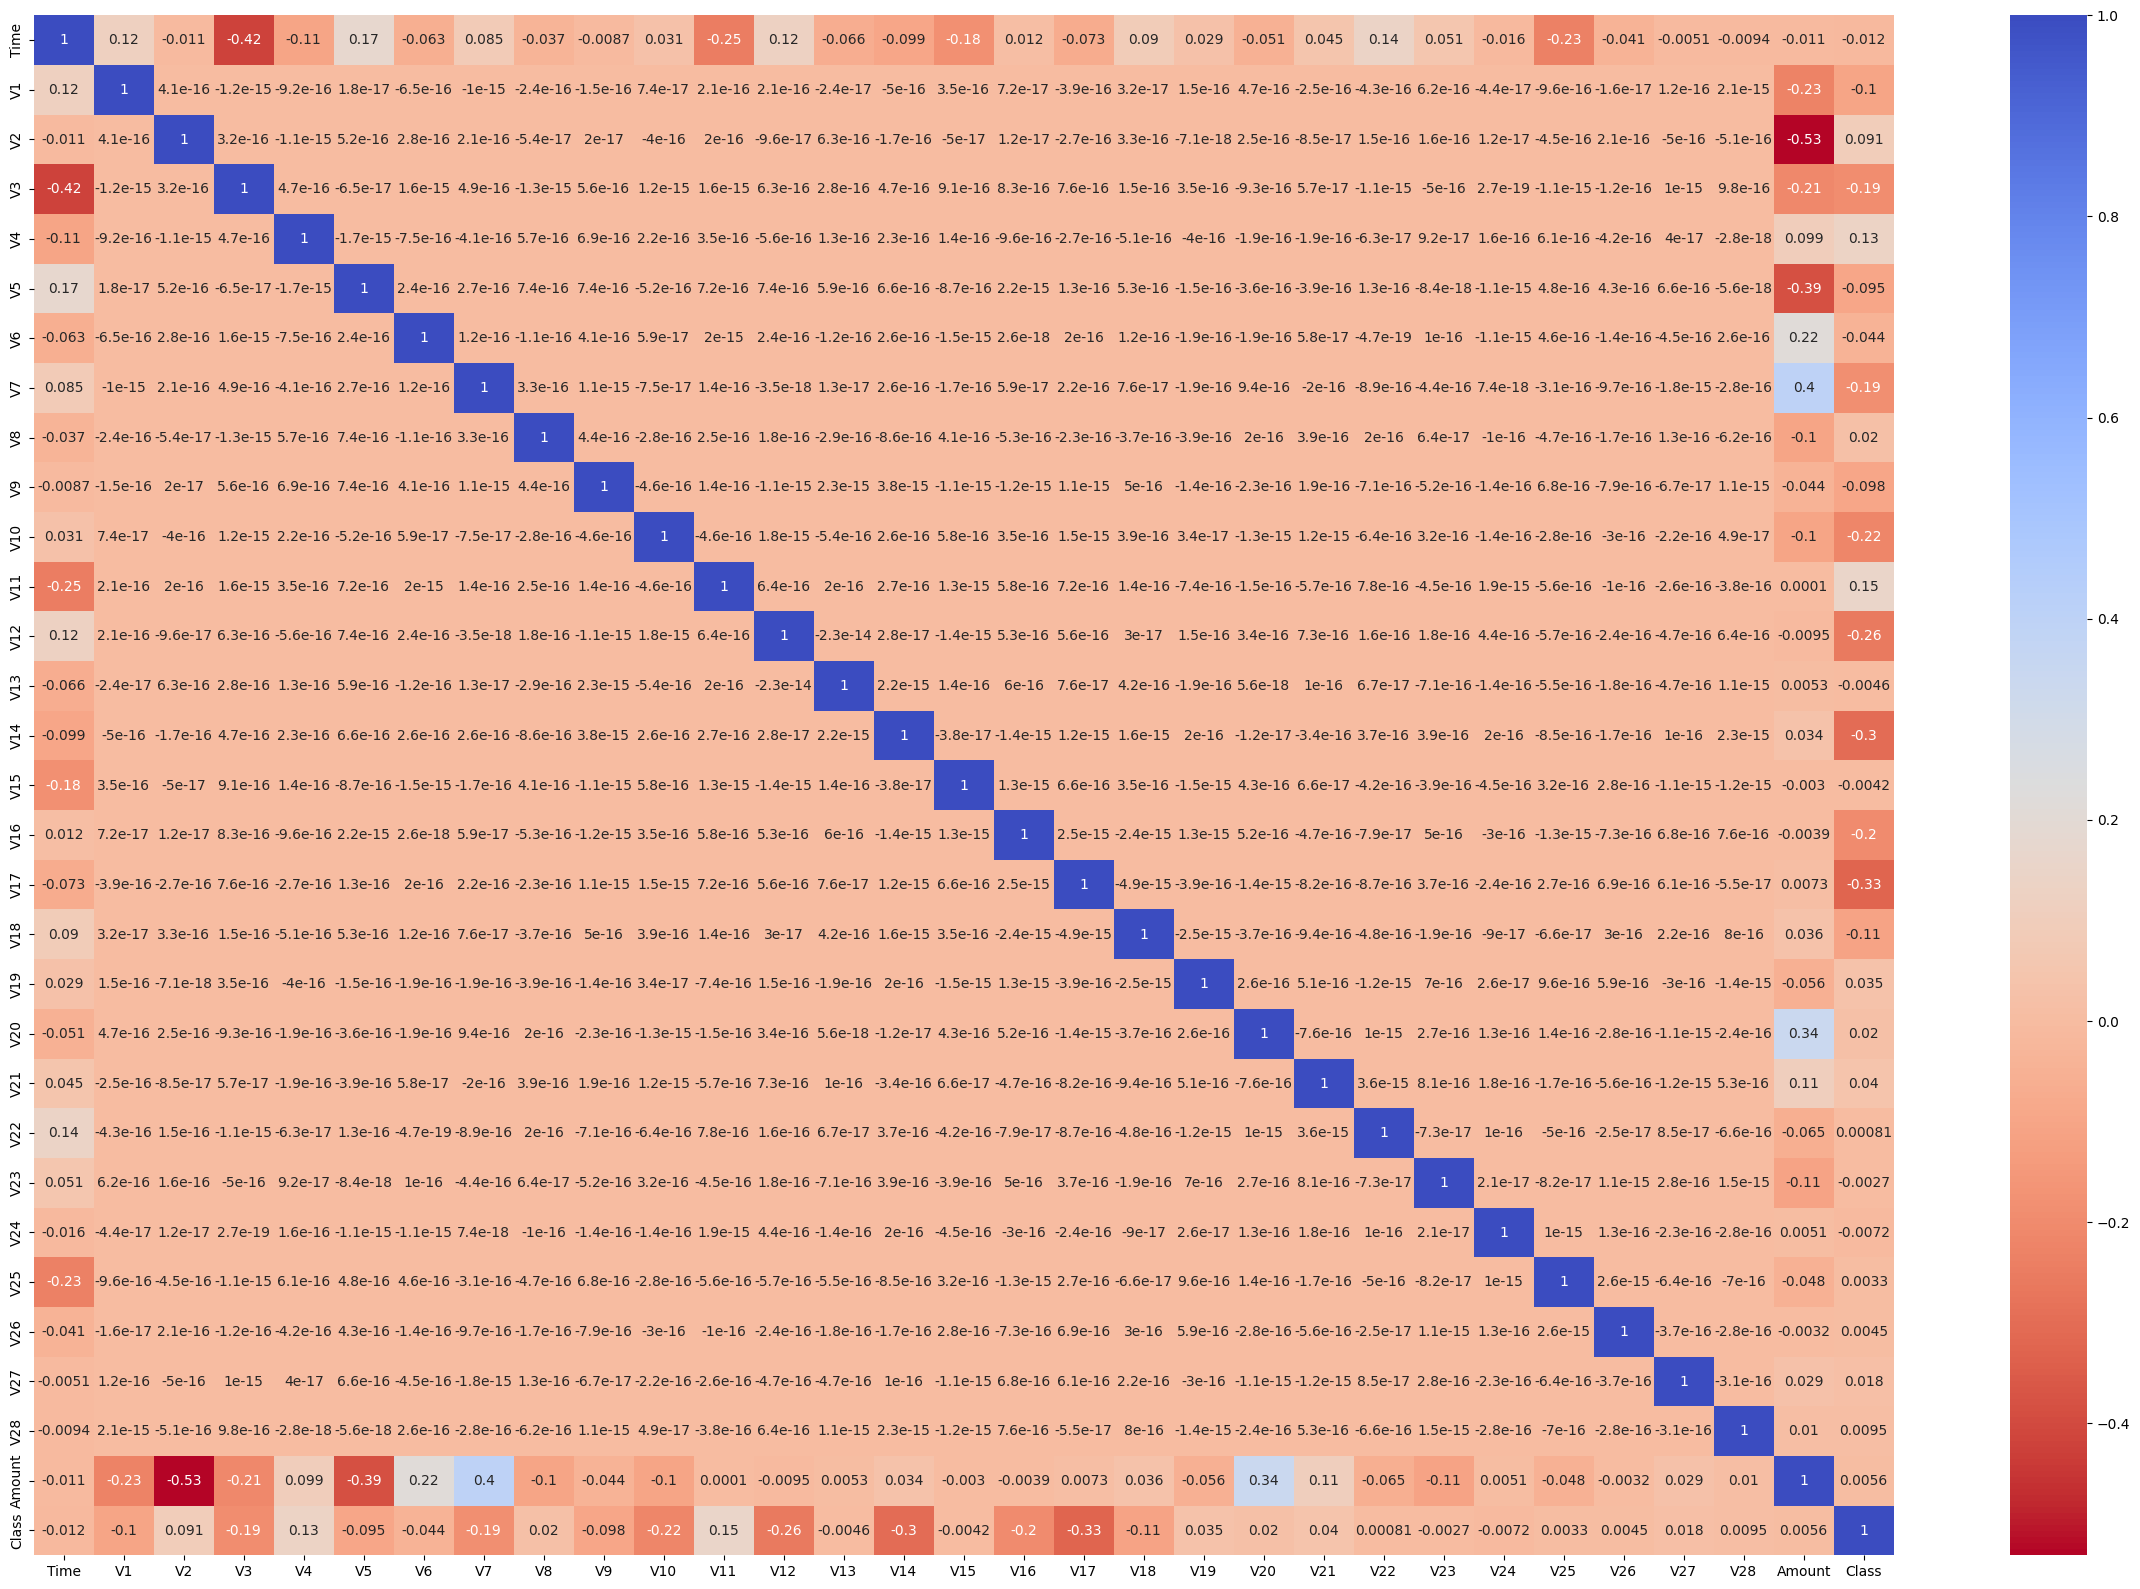

In [9]:
# Correlation Matrices

plt.figure(figsize=(30,20))

sns.heatmap(data.corr(),annot=True,cmap='coolwarm_r')

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

In [10]:
# Checking for duplicated entries
data.duplicated().sum()

1081

In [11]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

In [12]:
# splitting the data to legit and fraud
legit = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

print(f"Shape of legit data : {legit.shape}")
print(f"Shape of fraud data : {fraud.shape}")


Shape of legit data : (283253, 31)
Shape of fraud data : (473, 31)


In [13]:
# displaying head of legit
legit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# displaying head of fraud
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [15]:
# sampling the data of legit

legit_sampled = legit.sample(n=473,random_state=123)
legit_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152702,97442.0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95,0
123440,76926.0,-0.977923,1.503292,1.209271,0.569170,0.458301,-0.279697,1.091572,-0.519330,0.329349,...,0.018738,0.616262,-0.181989,0.082257,-0.251208,-0.373817,-0.087901,-0.094538,8.00,0
124838,77440.0,-0.591357,-0.915593,1.534353,-2.073147,-1.297029,-1.367997,0.075569,-0.215726,-2.354288,...,0.034130,0.115894,0.368135,0.857198,-0.398040,-0.455122,0.095367,0.170694,131.67,0
272527,165136.0,2.018371,0.063850,-1.617806,0.352243,0.321795,-0.679631,0.040873,-0.063150,0.323615,...,-0.308345,-0.852953,0.358594,0.651329,-0.336056,0.144834,-0.070685,-0.040174,1.79,0
176571,122825.0,-1.238054,-0.389592,2.386836,-1.107162,0.190922,0.203423,0.354894,0.143359,0.268802,...,0.110830,0.098117,-0.094508,-0.502477,0.354859,0.390893,-0.220871,-0.162397,117.71,0


In [16]:
# concatenating the legit_sampled and fraud data
new_data = pd.concat([legit_sampled,fraud])
new_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152702,97442.0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95,0
123440,76926.0,-0.977923,1.503292,1.209271,0.569170,0.458301,-0.279697,1.091572,-0.519330,0.329349,...,0.018738,0.616262,-0.181989,0.082257,-0.251208,-0.373817,-0.087901,-0.094538,8.00,0
124838,77440.0,-0.591357,-0.915593,1.534353,-2.073147,-1.297029,-1.367997,0.075569,-0.215726,-2.354288,...,0.034130,0.115894,0.368135,0.857198,-0.398040,-0.455122,0.095367,0.170694,131.67,0
272527,165136.0,2.018371,0.063850,-1.617806,0.352243,0.321795,-0.679631,0.040873,-0.063150,0.323615,...,-0.308345,-0.852953,0.358594,0.651329,-0.336056,0.144834,-0.070685,-0.040174,1.79,0
176571,122825.0,-1.238054,-0.389592,2.386836,-1.107162,0.190922,0.203423,0.354894,0.143359,0.268802,...,0.110830,0.098117,-0.094508,-0.502477,0.354859,0.390893,-0.220871,-0.162397,117.71,0


In [17]:
# checking the class distribution
new_data.Class.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

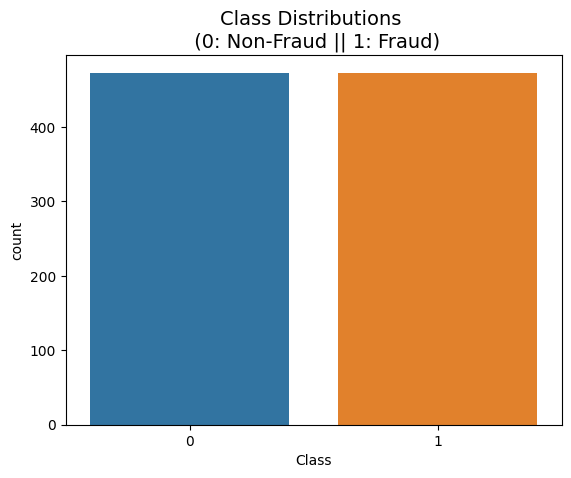

In [18]:
# plotting the class distribution
sns.countplot(data=new_data,x='Class')
plt.title('Class Distributions \n (0: Non-Fraud || 1: Fraud)', fontsize=14)
plt.show()


<Axes: >

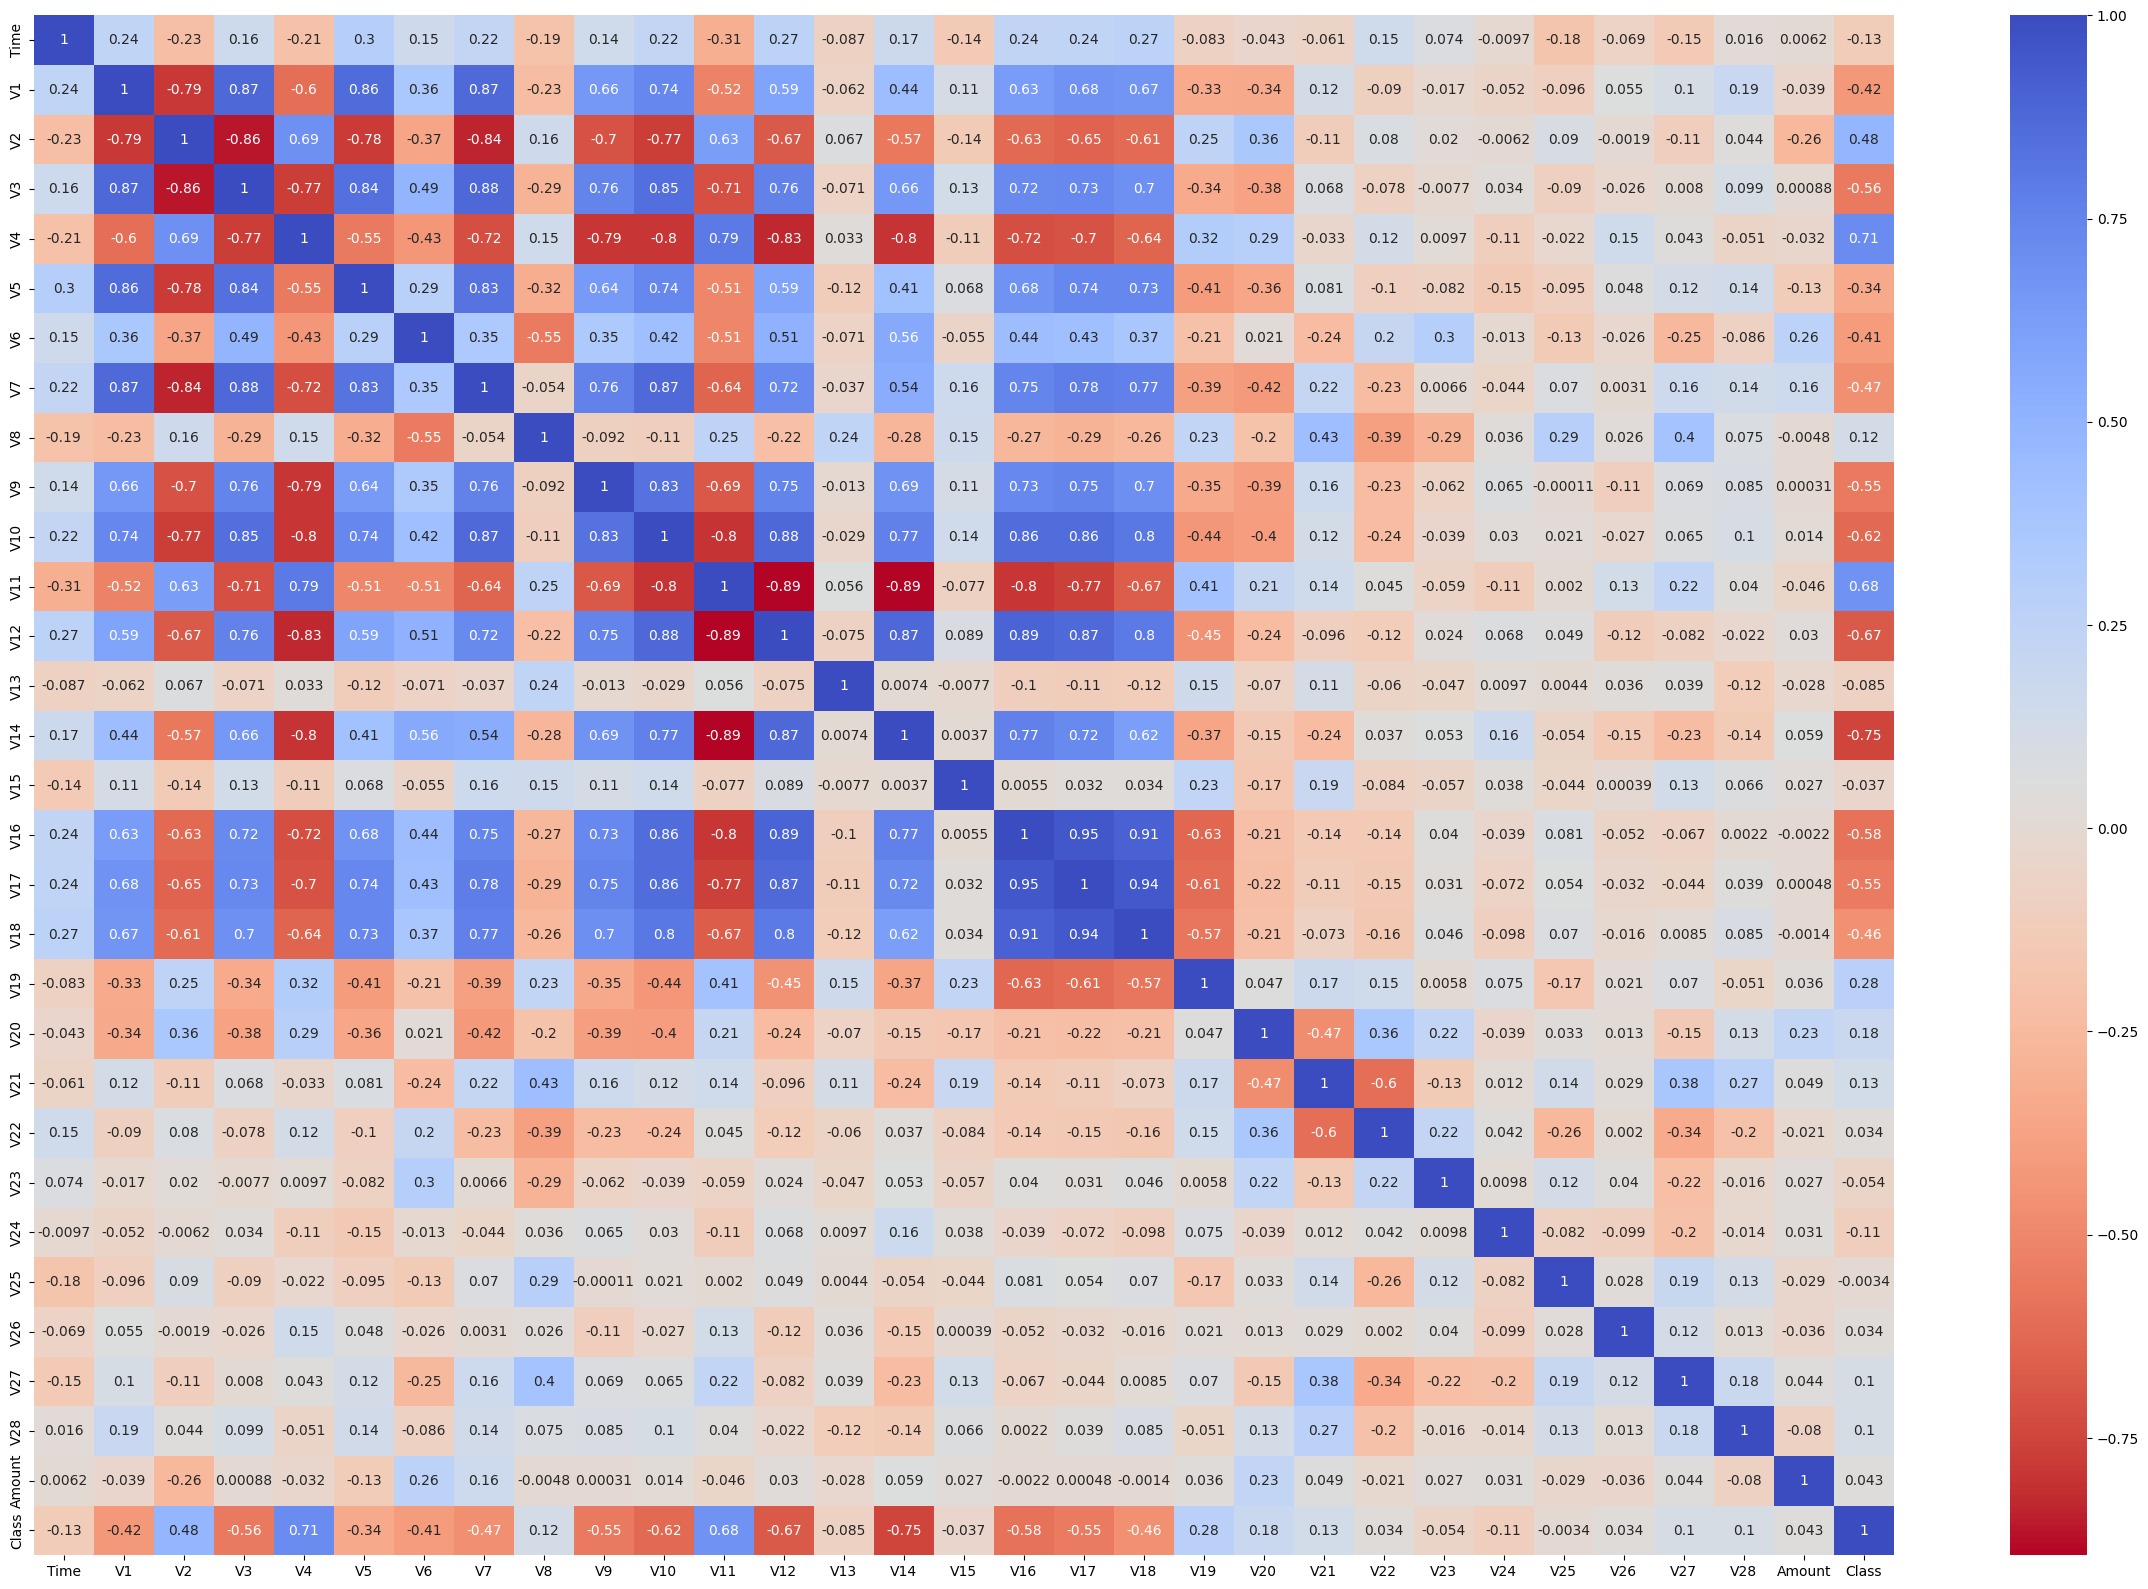

In [19]:
# Checking the correlation

plt.figure(figsize=(30,20))
sns.heatmap(new_data.corr(),annot=True,cmap='coolwarm_r')


In [20]:
# separating the features and target
X = new_data.drop('Class',axis=1)
y = new_data['Class']

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# checking the shape of the data

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")


Shape of X_train : (756, 30)
Shape of X_test : (190, 30)
Shape of y_train : (756,)
Shape of y_test : (190,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
clk = [
    ('LogisticRegression',LogisticRegression()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('RandomForestClassifier',RandomForestClassifier()),
    ('GradientBoostingClassifier',GradientBoostingClassifier()),
    ('GaussianNB',GaussianNB()),
    ('SVC',SVC())
]

for name,model in clk:
    model.fit(X_train,y_train)
    print(f"{name} : {model.score(X_test,y_test)}")




LogisticRegression : 0.9473684210526315
KNeighborsClassifier : 0.6157894736842106
DecisionTreeClassifier : 0.8894736842105263
RandomForestClassifier : 0.9578947368421052
GradientBoostingClassifier : 0.9526315789473684
GaussianNB : 0.9105263157894737
SVC : 0.4842105263157895


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       104
           1       0.96      0.95      0.96        86

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



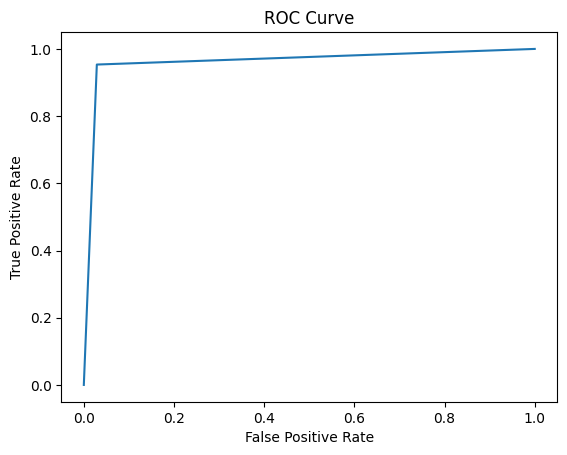

In [27]:
# make_pipeline

from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(),LogisticRegression())
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

# predicting the test data
y_pred = pipe.predict(X_test)


# checking the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# checking the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# checking the roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

# checking the roc_curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

